# Augmentation

In [1]:
import shutil
import os

# Source and destination paths
source_dir = "/kaggle/input/dip-d1/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays"
destination_dir = "/kaggle/working/Augmented/Normal"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the directory
try:
    shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)
    print(f"Directory copied from {source_dir} to {destination_dir}")
except Exception as e:
    print(f"Error: {e}")

Directory copied from /kaggle/input/dip-d1/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays to /kaggle/working/Augmented/Normal


In [2]:
import shutil
import os

# Source and destination paths
source_dir = "/kaggle/input/dip-d1/Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays"
destination_dir = "/kaggle/working/Augmented/Tuberculosis"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the directory
try:
    shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)
    print(f"Directory copied from {source_dir} to {destination_dir}")
except Exception as e:
    print(f"Error: {e}")


Directory copied from /kaggle/input/dip-d1/Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays to /kaggle/working/Augmented/Tuberculosis


In [3]:
import os
import shutil
import pathlib

def copy_images_by_class(base_folder, augment_folder):
    """
    Copies images from a base folder to an augment folder, organizing them into
    subfolders based on their class names. This version assumes the class
    name is the *last* directory in the path.

    Args:
        base_folder (str): The root folder containing the original image
                           directory structure (e.g., 'train', 'test', 'val').
        augment_folder (str): The destination folder in the Kaggle working
                            directory where the class folders will be created.
    """
    # Ensure the augment folder exists
    os.makedirs(augment_folder, exist_ok=True)

    # Use pathlib for easier path manipulation
    base_path = pathlib.Path(base_folder)

    # Walk through the directory structure
    for img_path in base_path.glob("**/*"):  # Corrected to use pathlib's glob
        if img_path.is_file() and img_path.suffix.lower() in ('.png', '.jpg', '.jpeg', '.gif', '.bmp'):
            # Get the class name, which is the parent directory name
            class_name = img_path.parent.name
            # Create the destination directory for the class in the augment folder
            class_augment_dir = os.path.join(augment_folder, class_name)
            os.makedirs(class_augment_dir, exist_ok=True)

            # Construct the destination path
            dest_path = os.path.join(class_augment_dir, img_path.name)

            try:
                # Copy the image
                shutil.copy2(str(img_path), dest_path)
                print(f"Copied: {img_path} to {dest_path}")
            except Exception as e:
                print(f"Error copying {img_path}: {e}")

def main():
    """
    Main function to set the source and destination folders and call the copy function.
    """
    # Specify the base folder where your data is located.  Adjust as needed.
    base_folder = '/kaggle/input/normal-tuberculosis-covid/Lung Disease Dataset Covid Normal Tuberculosis'  # Replace

    # Specify the destination folder in the Kaggle working directory
    augment_folder = '/kaggle/working/Augmented'

    # Call the function to copy the images
    copy_images_by_class(base_folder, augment_folder)
    print("Image copying and organization complete.")

if __name__ == "__main__":
    main()


Copied: /kaggle/input/normal-tuberculosis-covid/Lung Disease Dataset Covid Normal Tuberculosis/val/Tuberculosis/test_0_5161.jpeg to /kaggle/working/Augmented/Tuberculosis/test_0_5161.jpeg
Copied: /kaggle/input/normal-tuberculosis-covid/Lung Disease Dataset Covid Normal Tuberculosis/val/Tuberculosis/test_0_4769.jpeg to /kaggle/working/Augmented/Tuberculosis/test_0_4769.jpeg
Copied: /kaggle/input/normal-tuberculosis-covid/Lung Disease Dataset Covid Normal Tuberculosis/val/Tuberculosis/test_0_1443.jpeg to /kaggle/working/Augmented/Tuberculosis/test_0_1443.jpeg
Copied: /kaggle/input/normal-tuberculosis-covid/Lung Disease Dataset Covid Normal Tuberculosis/val/Tuberculosis/test_0_5261.jpeg to /kaggle/working/Augmented/Tuberculosis/test_0_5261.jpeg
Copied: /kaggle/input/normal-tuberculosis-covid/Lung Disease Dataset Covid Normal Tuberculosis/val/Tuberculosis/Tuberculosis-392.jpg to /kaggle/working/Augmented/Tuberculosis/Tuberculosis-392.jpg
Copied: /kaggle/input/normal-tuberculosis-covid/Lung

                  Class  Number of Images
0                Normal              2527
1          Tuberculosis              4528
2  Corona Virus Disease              2031


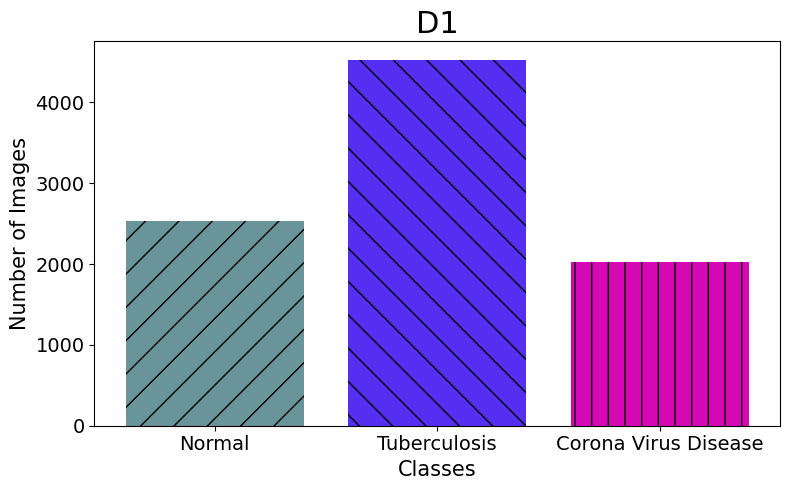

In [4]:
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import os
import itertools
import random
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Define the path to your dataset directory
dataset_path = "/kaggle/working/Augmented"

plt.style.use('default')

# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Count the number of images in each category
image_counts = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]
    image_counts.append(len(image_files))

# Create a dataframe to show the number of images per class
data = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(data)


# Create a bar chart to visualize the number of images in each category
plt.figure(figsize=(8, 5))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"]  # Define patterns for bars
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]  # Generate unique colors
bars = plt.bar(categories, image_counts, color=colors)
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("D1", fontsize=22)
plt.xlabel("Classes", fontsize=15)
plt.ylabel("Number of Images", fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('before_augmentation.png', format='png', dpi=600)
plt.show()


In [5]:
import os
from PIL import Image
import numpy as np
from imgaug import augmenters as iaa

# Define paths
input_folder = r'/kaggle/working/Augmented/Corona Virus Disease'
output_folder = r'/kaggle/working/Augmented/Corona Virus Disease'

# Create the output directory if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            with Image.open(img_path) as img:
                img = img.convert('RGB')  # Force RGB
                images.append(np.array(img))
                filenames.append(filename)
        except Exception as e:
            print(f"❌ Error loading {img_path}: {e}")
    return images, filenames

# Load original images
images, original_filenames = load_images_from_folder(input_folder)
original_count = len(images)

if original_count == 0:
    print("⚠️ No images found in the input folder. Exiting.")
    exit()

print(f"Found {original_count} original images in the input folder")

# Calculate how many more images we need to generate
target_total = 5000
remaining_needed = max(0, target_total - original_count)

if remaining_needed == 0:
    print(f"✅ Already have {original_count} images, which meets or exceeds the target of {target_total}. No augmentation needed.")
    exit()

print(f"Need to generate {remaining_needed} more images to reach {target_total} total")

# Define augmentation pipeline
seq = iaa.Sequential([
    iaa.Fliplr(0.5),                  # Horizontal flip
    iaa.Flipud(0.5),                  # Vertical flip
    iaa.Multiply((0.6, 0.8)),         # Adjust brightness
    iaa.Affine(scale=(0.8, 1.0)),     # Zoom in/out
    iaa.Affine(rotate=(-10, 10)),     # Rotate
    iaa.Crop(percent=(0, 0.2)),       # Random crop
])

# Calculate how many augmentations per original image
augmentations_per_image = (remaining_needed // original_count) + 1

# Augment and save images
augmented_count = 0
for i, image in enumerate(images):
    for j in range(augmentations_per_image):
        if augmented_count >= remaining_needed:
            break
        augmented_image = seq(image=image)  # Apply augmentation
        augmented_image_pil = Image.fromarray(augmented_image)
        # Ensure image is RGB before saving as JPG
        if augmented_image_pil.mode != 'RGB':
            augmented_image_pil = augmented_image_pil.convert('RGB')
        output_path = os.path.join(
            output_folder, f'augmented_{i}_{j}.JPG'
        )
        try:
            augmented_image_pil.save(output_path)
            augmented_count += 1
            if augmented_count % 100 == 0:
                print(f"Progress: {augmented_count}/{remaining_needed} augmented images created")
        except Exception as e:
            print(f"❌ Error saving {output_path}: {e}")

final_total = original_count + augmented_count
print(f"✅ Augmentation complete: {augmented_count} new images created")
print(f"✅ Total images in folder: {final_total}/{target_total}")

Found 2031 original images in the input folder
Need to generate 2969 more images to reach 5000 total
Progress: 100/2969 augmented images created
Progress: 200/2969 augmented images created
Progress: 300/2969 augmented images created
Progress: 400/2969 augmented images created
Progress: 500/2969 augmented images created
Progress: 600/2969 augmented images created
Progress: 700/2969 augmented images created
Progress: 800/2969 augmented images created
Progress: 900/2969 augmented images created
Progress: 1000/2969 augmented images created
Progress: 1100/2969 augmented images created
Progress: 1200/2969 augmented images created
Progress: 1300/2969 augmented images created
Progress: 1400/2969 augmented images created
Progress: 1500/2969 augmented images created
Progress: 1600/2969 augmented images created
Progress: 1700/2969 augmented images created
Progress: 1800/2969 augmented images created
Progress: 1900/2969 augmented images created
Progress: 2000/2969 augmented images created
Progress

In [6]:
import os
from PIL import Image
import cv2
import numpy as np
from imgaug import augmenters as iaa


# Define paths
input_folder = r'/kaggle/working/Augmented/Normal'
# Output directory where augmented images will be saved
output_folder = r'/kaggle/working/Augmented/Normal'

# Create the output directory if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(np.array(img))
    return images

# Load the original images
images = load_images_from_folder(input_folder)

# Define an augmentation pipeline
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip
    iaa.Flipud(0.5),  # Vertical flip
    iaa.Multiply((0.6, 0.8)),  # Adjust brightness
    iaa.Affine(scale=(0.8, 1.0)),  # Zoom in/out by 80% to 120%
    iaa.Affine(rotate=(-10, 10)),  # Rotate by -20 to 20 degrees
    iaa.Crop(percent=(0, 0.2)),  # Crop images
])

# Number of augmentations per original image
augmentations_per_image = (5000 - len(images)) // len(images) + 1

# Augment and save images
augmented_count = 0
for i, image in enumerate(images):
    for _ in range(augmentations_per_image):
        augmented_image = seq(image=image)
        augmented_image_pil = Image.fromarray(augmented_image)
        output_path = os.path.join(output_folder, f'augmented_{i}_{augmented_count}.JPG')
        augmented_image_pil.save(output_path)
        augmented_count += 1
        if augmented_count >= (5000 - len(images)):
            break
    if augmented_count >= (5000 - len(images)):
        break

print(f"Augmented images saved in {output_folder}")

Augmented images saved in /kaggle/working/Augmented/Normal


In [7]:
import os
from PIL import Image
import cv2
import numpy as np
from imgaug import augmenters as iaa


# Define paths
input_folder = r'/kaggle/working/Augmented/Tuberculosis'
# Output directory where augmented images will be saved
output_folder = r'/kaggle/working/Augmented/Tuberculosis'

# Create the output directory if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(np.array(img))
    return images

# Load the original images
images = load_images_from_folder(input_folder)

# Define an augmentation pipeline
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip
    iaa.Flipud(0.5),  # Vertical flip
    iaa.Multiply((0.6, 0.8)),  # Adjust brightness
    iaa.Affine(scale=(0.8, 1.0)),  # Zoom in/out by 80% to 120%
    iaa.Affine(rotate=(-10, 10)),  # Rotate by -20 to 20 degrees
    iaa.Crop(percent=(0, 0.2)),  # Crop images
])

# Number of augmentations per original image
augmentations_per_image = (5000 - len(images)) // len(images) + 1

# Augment and save images
augmented_count = 0
for i, image in enumerate(images):
    for _ in range(augmentations_per_image):
        augmented_image = seq(image=image)
        augmented_image_pil = Image.fromarray(augmented_image)
        output_path = os.path.join(output_folder, f'augmented_{i}_{augmented_count}.JPG')
        augmented_image_pil.save(output_path)
        augmented_count += 1
        if augmented_count >= (5000 - len(images)):
            break
    if augmented_count >= (5000 - len(images)):
        break

print(f"Augmented images saved in {output_folder}")

Augmented images saved in /kaggle/working/Augmented/Tuberculosis


# EDA

                  Class  Number of Images
0                Normal              5000
1          Tuberculosis              5000
2  Corona Virus Disease              5000


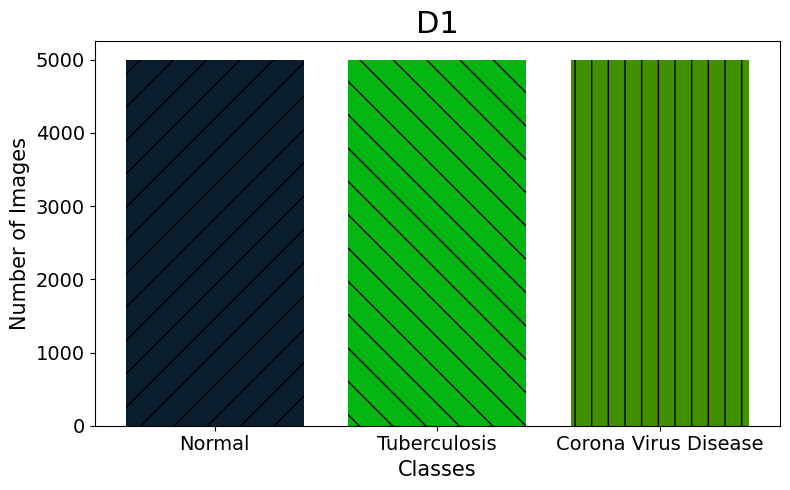

In [8]:
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import os
import itertools
import random
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Define the path to your dataset directory
dataset_path = "/kaggle/working/Augmented"

plt.style.use('default')

# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Count the number of images in each category
image_counts = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]
    image_counts.append(len(image_files))

# Create a dataframe to show the number of images per class
data = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(data)


# Create a bar chart to visualize the number of images in each category
plt.figure(figsize=(8, 5))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"]  # Define patterns for bars
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]  # Generate unique colors
bars = plt.bar(categories, image_counts, color=colors)
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("D1", fontsize=22)
plt.xlabel("Classes", fontsize=15)
plt.ylabel("Number of Images", fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('after_augmentation.png', format='png', dpi=600)
plt.show()


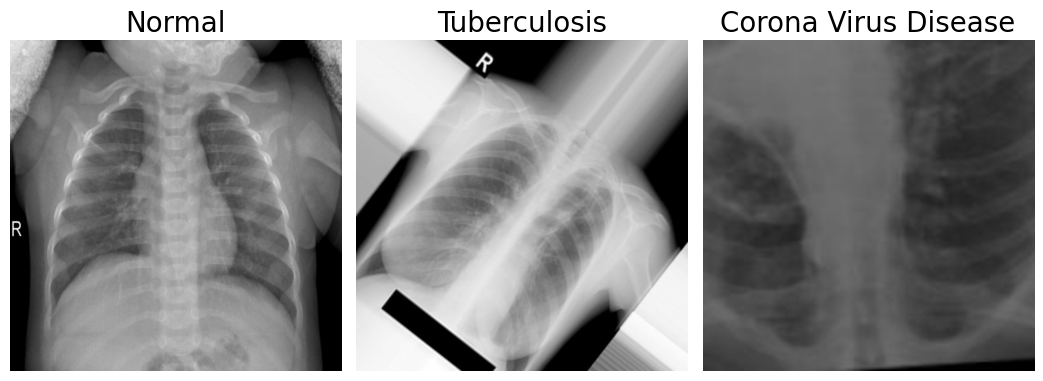

In [9]:
# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Define a transform to resize images and convert them to tensors
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize images to 512x512 for uniformity
    transforms.ToTensor()
])

# Initialize a figure for visualization
plt.figure(figsize=(14, 4))  # Adjusted figure size for better clarity with 2 rows and 4 columns

for i, category in enumerate(categories):
    # Get the path of the category folder
    category_path = os.path.join(dataset_path, category)

    # Get the list of image files in the category folder
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]

    # Ensure there is at least one image in the category
    if not image_files:
        print(f"No images found in category: {category}")
        continue

    # Randomly select an image from the category
    image_path = os.path.join(category_path, random.choice(image_files))
    image = Image.open(image_path).convert("RGB")

    # Apply the transform
    image = transform(image)

    # Convert the tensor back to a PIL image for visualization
    image = transforms.ToPILImage()(image)

    # Add the image to the plot
    plt.subplot(1, 4, i + 1)  # Updated to 2 rows and 4 columns
    plt.imshow(image)
    plt.title(category, fontsize=20)  # Increased font size for category labels
    plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('D3sample.png', format='png', dpi=600)
plt.show()

# Training

In [10]:
import os
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
data_dir = "/kaggle/working/Augmented"

In [12]:
# Custom dataset loader for image data
class CustomImageDataset(Dataset):
    def __init__(self, filepaths, labels, transform=None):
        self.filepaths = filepaths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.filepaths)
    
    def __getitem__(self, idx):
        image = cv2.imread(self.filepaths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Load data

def loading_the_data(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)

    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            
            filepaths.append(fpath)
            labels.append(fold)

    return pd.DataFrame({"filepaths": filepaths, "labels": labels})

# data_dir = "F:\\Ml files\\XAI\\Grape\\Combined (D4)"
df = loading_the_data(data_dir)

                  Class  Number of Images
0                Normal              5000
1          Tuberculosis              5000
2  Corona Virus Disease              5000


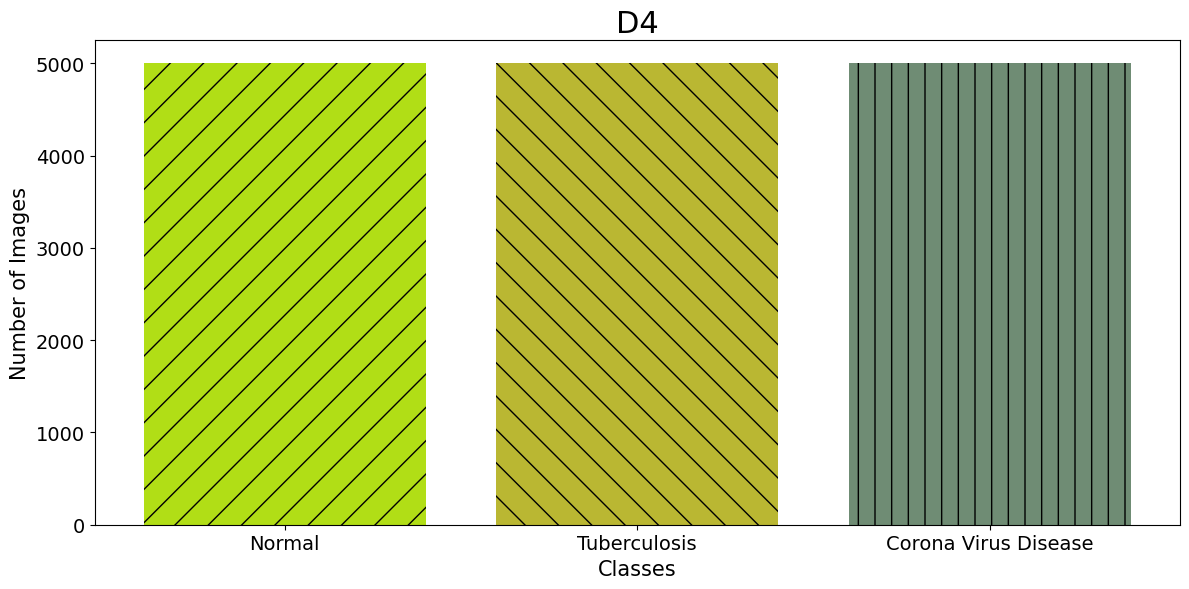

In [13]:
import random
plt.style.use('default')

# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Count the number of images in each category
image_counts = []
for category in categories:
    category_path = os.path.join(data_dir, category)
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]
    image_counts.append(len(image_files))

# Create a dataframe to show the number of images per class
data = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(data)


# Create a bar chart to visualize the number of images in each category
plt.figure(figsize=(12, 6))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"]  # Define patterns for bars
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]  # Generate unique colors
bars = plt.bar(categories, image_counts, color=colors)
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("D4", fontsize=22)
plt.xlabel("Classes", fontsize=15)
plt.ylabel("Number of Images", fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('D1_barchart.png', format='png', dpi=600)
plt.show()

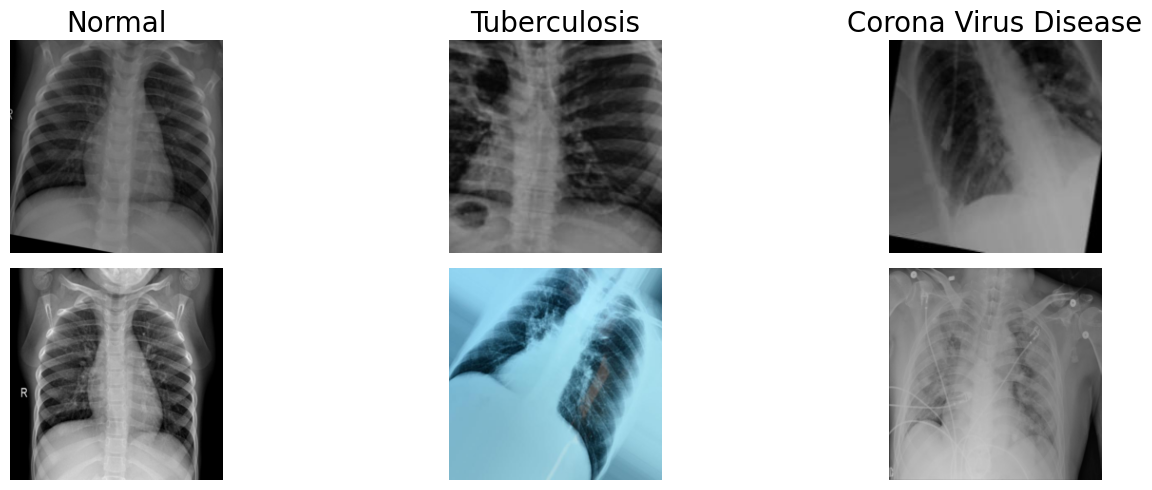

In [14]:
from PIL import Image

# Define a transform to resize images and convert them to tensors
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 512x512 for uniformity
    transforms.ToTensor()
])

# Number of rows and columns
rows, cols = 2, 3

# Ensure categories list contains at least `cols` categories
if len(categories) < cols:
    raise ValueError("Not enough categories to display.")

# Initialize a figure for visualization
plt.figure(figsize=(15, 5))  # Adjusted figure size for better clarity with 2 rows and 5 columns

# Iterate twice to create two rows with different images from the same categories
for row in range(rows):
    for col, category in enumerate(categories[:cols]):  # Use the first `cols` categories
        # Get the path of the category folder
        category_path = os.path.join(data_dir, category)

        # Get the list of image files in the category folder
        image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]

        # Ensure there is at least one image in the category
        if not image_files:
            print(f"No images found in category: {category}")
            continue

        # Randomly select an image from the category
        image_path = os.path.join(category_path, random.choice(image_files))
        image = Image.open(image_path).convert("RGB")

        # Apply the transform
        image = transform(image)

        # Convert the tensor back to a PIL image for visualization
        image = transforms.ToPILImage()(image)

        # Add the image to the plot
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.imshow(image)
        
        # Set title only for the first row
        if row == 0:
            plt.title(category, fontsize=20)
        
        plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('D1 sample.png', format='png', dpi=600)
plt.show()

In [15]:
# Data transformation
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [16]:
# Splitting data
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)  # 80% train, 20% temp
val_df, test_df = train_test_split(temp_df, test_size=0.75, stratify=temp_df['labels'], random_state=42)  # 75% of temp (15% of total) for test

In [17]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(12000, 2)
(750, 2)
(2250, 2)


In [18]:
import pandas as pd

# Assuming train_df, val_df, and test_df have a 'labels' column
train_counts = train_df['labels'].value_counts()
val_counts = val_df['labels'].value_counts()
test_counts = test_df['labels'].value_counts()

# Combine into a single DataFrame
class_counts = pd.DataFrame({
    'Training': train_counts,
    'Validation': val_counts,
    'Testing': test_counts
}).fillna(0).astype(int)  # Fill NaN with 0 and convert to integer

# Add a column for total counts (optional)
class_counts['Total'] = class_counts.sum(axis=1)

# Display the table
print(class_counts)


                      Training  Validation  Testing  Total
labels                                                    
Corona Virus Disease      4000         250      750   5000
Normal                    4000         250      750   5000
Tuberculosis              4000         250      750   5000


In [19]:
# Encoding labels
label_mapping = {label: idx for idx, label in enumerate(df['labels'].unique())}
train_labels = train_df['labels'].map(label_mapping).values
val_labels = val_df['labels'].map(label_mapping).values
test_labels = test_df['labels'].map(label_mapping).values

# Creating datasets and loaders
train_dataset = CustomImageDataset(train_df['filepaths'].values, train_labels, transform=data_transform)
val_dataset = CustomImageDataset(val_df['filepaths'].values, val_labels, transform=data_transform)
test_dataset = CustomImageDataset(test_df['filepaths'].values, test_labels, transform=data_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0, pin_memory=True)

In [20]:
# Model setup
if not torch.cuda.is_available():
    raise RuntimeError('CUDA device is not available. Please ensure a GPU is available to train the model.')
device = torch.device('cuda')
device

device(type='cuda')

# Resnext 50

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained ResNeXt-50 model
model = models.resnext50_32x4d(pretrained=True)

# Get the number of input features from the original classifier
num_ftrs = model.fc.in_features

# Replace the classifier (fully connected layer) with a new one
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Adjust output layer to the number of classes
    nn.LogSoftmax(dim=1)
)

# Move the model to the specified device
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model initialized and ready for training!")


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 195MB/s]


Model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.8841, Validation Accuracy: 0.7707
Epoch 1/20, Loss: 0.4924, Accuracy: 0.8168
Epoch 2/20
----------


Validation Loss: 0.2009, Validation Accuracy: 0.9147
Epoch 2/20, Loss: 0.3330, Accuracy: 0.8791
Epoch 3/20
----------


Validation Loss: 0.1576, Validation Accuracy: 0.9400
Epoch 3/20, Loss: 0.2636, Accuracy: 0.9066
Epoch 4/20
----------


Validation Loss: 0.1684, Validation Accuracy: 0.9400
Epoch 4/20, Loss: 0.2243, Accuracy: 0.9214
Epoch 5/20
----------


Validation Loss: 0.1888, Validation Accuracy: 0.9387
Epoch 5/20, Loss: 0.1984, Accuracy: 0.9328
Epoch 6/20
----------


Validation Loss: 0.1145, Validation Accuracy: 0.9653
Epoch 6/20, Loss: 0.1839, Accuracy: 0.9379
Epoch 7/20
----------


Validation Loss: 0.0876, Validation Accuracy: 0.9680
Epoch 7/20, Loss: 0.1606, Accuracy: 0.9470
Epoch 8/20
----------


Validation Loss: 0.0804, Validation Accuracy: 0.9707
Epoch 8/20, Loss: 0.1277, Accuracy: 0.9553
Epoch 9/20
----------


Validation Loss: 0.0823, Validation Accuracy: 0.9720
Epoch 9/20, Loss: 0.1283, Accuracy: 0.9570
Epoch 10/20
----------


Validation Loss: 0.0725, Validation Accuracy: 0.9720
Epoch 10/20, Loss: 0.1096, Accuracy: 0.9655
Epoch 11/20
----------


Validation Loss: 0.0786, Validation Accuracy: 0.9733
Epoch 11/20, Loss: 0.0971, Accuracy: 0.9670
Epoch 12/20
----------


Validation Loss: 0.0849, Validation Accuracy: 0.9653
Epoch 12/20, Loss: 0.0984, Accuracy: 0.9686
Epoch 13/20
----------


Validation Loss: 0.1636, Validation Accuracy: 0.9507
Epoch 13/20, Loss: 0.0817, Accuracy: 0.9732
Epoch 14/20
----------


Validation Loss: 0.1035, Validation Accuracy: 0.9613
Epoch 14/20, Loss: 0.0762, Accuracy: 0.9742
Epoch 15/20
----------


Validation Loss: 0.1076, Validation Accuracy: 0.9707
Epoch 15/20, Loss: 0.0719, Accuracy: 0.9762
Epoch 16/20
----------


Validation Loss: 0.0605, Validation Accuracy: 0.9787
Epoch 16/20, Loss: 0.0688, Accuracy: 0.9777
Epoch 17/20
----------


Validation Loss: 0.0978, Validation Accuracy: 0.9653
Epoch 17/20, Loss: 0.0584, Accuracy: 0.9800
Epoch 18/20
----------


Validation Loss: 0.0637, Validation Accuracy: 0.9787
Epoch 18/20, Loss: 0.0828, Accuracy: 0.9732
Epoch 19/20
----------


Validation Loss: 0.0573, Validation Accuracy: 0.9827
Epoch 19/20, Loss: 0.0557, Accuracy: 0.9805
Epoch 20/20
----------


Validation Loss: 0.0544, Validation Accuracy: 0.9787
Epoch 20/20, Loss: 0.0502, Accuracy: 0.9829


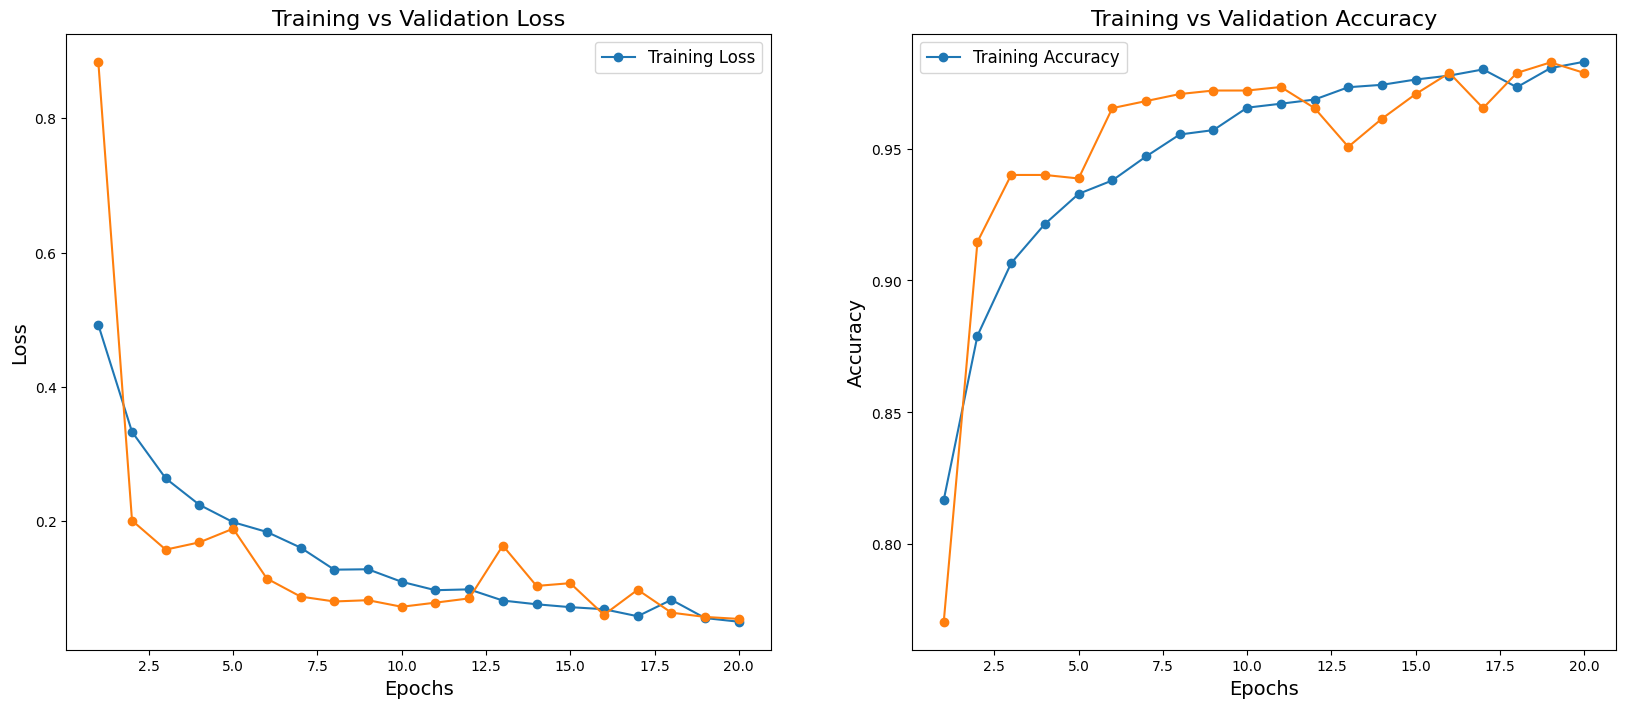

In [22]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[249   0   1]
 [  2 243   5]
 [  3   5 242]]


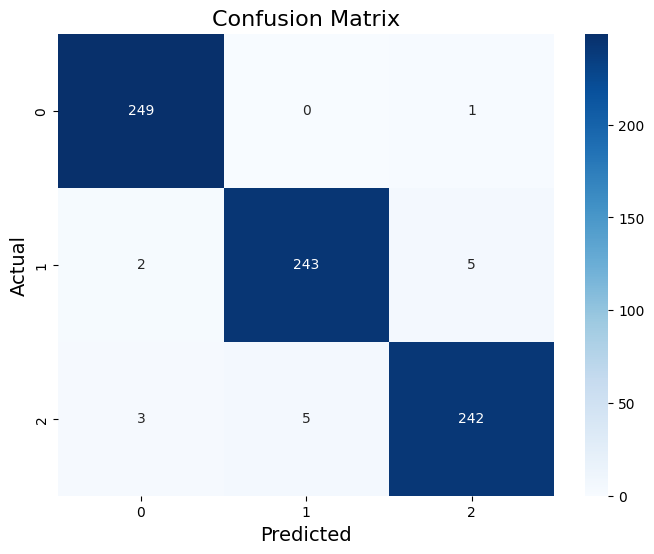

Specificity is only defined for binary classification.
Matthews Correlation Coefficient (MCC): 0.9680
F1 Score: 0.9786
PR AUC is usually computed for binary classification.

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       0.98      0.97      0.98       250
           2       0.98      0.97      0.97       250

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750



In [23]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [24]:
# Save the model
torch.save(model.state_dict(), "resnext50.pth")

In [25]:
model_resnetx50 = model

# DenseNet-201

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained DenseNet-201 model
model = models.densenet201(pretrained=True)

# Get the number of input features from the original classifier
num_ftrs = model.classifier.in_features  # DenseNet uses a `classifier` instead of `fc`

# Replace the classifier (fully connected layer) with a new one
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Adjust output layer to the number of classes
    nn.LogSoftmax(dim=1)
)

# Move the model to the specified device
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("DenseNet-201 model initialized and ready for training!")


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 162MB/s]


DenseNet-201 model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.3042, Validation Accuracy: 0.8693
Epoch 1/20, Loss: 0.4788, Accuracy: 0.8217
Epoch 2/20
----------


Validation Loss: 0.3682, Validation Accuracy: 0.8480
Epoch 2/20, Loss: 0.3025, Accuracy: 0.8887
Epoch 3/20
----------


Validation Loss: 0.1722, Validation Accuracy: 0.9467
Epoch 3/20, Loss: 0.2584, Accuracy: 0.9077
Epoch 4/20
----------


Validation Loss: 0.1675, Validation Accuracy: 0.9440
Epoch 4/20, Loss: 0.2103, Accuracy: 0.9262
Epoch 5/20
----------


Validation Loss: 0.1985, Validation Accuracy: 0.9280
Epoch 5/20, Loss: 0.1891, Accuracy: 0.9341
Epoch 6/20
----------


Validation Loss: 0.1262, Validation Accuracy: 0.9533
Epoch 6/20, Loss: 0.1713, Accuracy: 0.9403
Epoch 7/20
----------


Validation Loss: 0.1144, Validation Accuracy: 0.9613
Epoch 7/20, Loss: 0.1508, Accuracy: 0.9489
Epoch 8/20
----------


Validation Loss: 0.1138, Validation Accuracy: 0.9533
Epoch 8/20, Loss: 0.1439, Accuracy: 0.9505
Epoch 9/20
----------


Validation Loss: 0.0783, Validation Accuracy: 0.9733
Epoch 9/20, Loss: 0.1238, Accuracy: 0.9572
Epoch 10/20
----------


Validation Loss: 0.0826, Validation Accuracy: 0.9653
Epoch 10/20, Loss: 0.1194, Accuracy: 0.9596
Epoch 11/20
----------


Validation Loss: 0.1078, Validation Accuracy: 0.9613
Epoch 11/20, Loss: 0.0990, Accuracy: 0.9633
Epoch 12/20
----------


Validation Loss: 0.1957, Validation Accuracy: 0.9240
Epoch 12/20, Loss: 0.0902, Accuracy: 0.9686
Epoch 13/20
----------


Validation Loss: 0.1541, Validation Accuracy: 0.9480
Epoch 13/20, Loss: 0.0869, Accuracy: 0.9709
Epoch 14/20
----------


Validation Loss: 0.0920, Validation Accuracy: 0.9653
Epoch 14/20, Loss: 0.0738, Accuracy: 0.9732
Epoch 15/20
----------


Validation Loss: 0.0953, Validation Accuracy: 0.9707
Epoch 15/20, Loss: 0.0776, Accuracy: 0.9730
Epoch 16/20
----------


Validation Loss: 0.0832, Validation Accuracy: 0.9760
Epoch 16/20, Loss: 0.0670, Accuracy: 0.9774
Epoch 17/20
----------


Validation Loss: 0.0854, Validation Accuracy: 0.9800
Epoch 17/20, Loss: 0.0575, Accuracy: 0.9798
Epoch 18/20
----------


Validation Loss: 0.1387, Validation Accuracy: 0.9560
Epoch 18/20, Loss: 0.0673, Accuracy: 0.9773
Epoch 19/20
----------


Validation Loss: 0.2050, Validation Accuracy: 0.9360
Epoch 19/20, Loss: 0.0537, Accuracy: 0.9819
Epoch 20/20
----------


Validation Loss: 0.0975, Validation Accuracy: 0.9733
Epoch 20/20, Loss: 0.0503, Accuracy: 0.9835


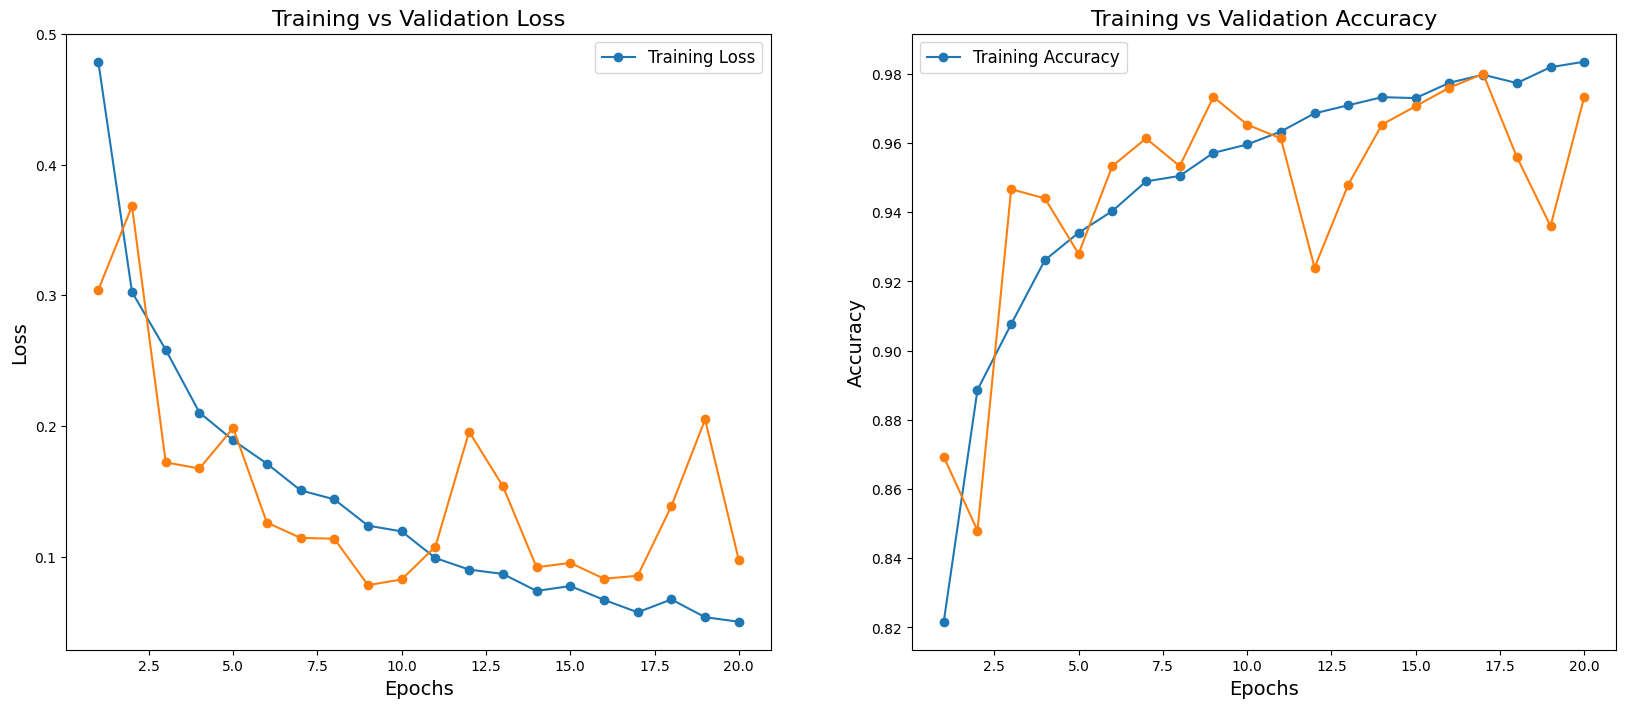

In [27]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[248   0   2]
 [  1 238  11]
 [  1   5 244]]


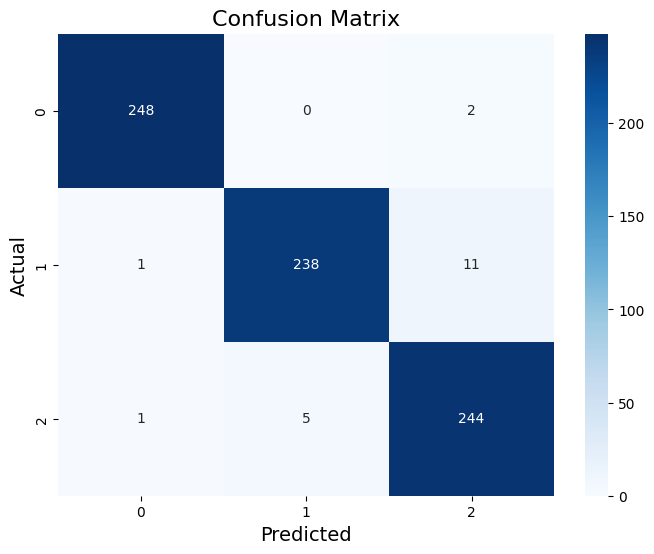

Specificity is only defined for binary classification.
Matthews Correlation Coefficient (MCC): 0.9601
F1 Score: 0.9733
PR AUC is usually computed for binary classification.

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       250
           1       0.98      0.95      0.97       250
           2       0.95      0.98      0.96       250

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750



In [28]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [29]:
# Save the model
torch.save(model.state_dict(), "densenet201.pth")

In [30]:
model_densenet201 = model

# ShuffleNet v2

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ShuffleNet v2 (1.0x output channels)
model = models.shufflenet_v2_x1_0(pretrained=True)

# Get the number of input features to the classifier
num_ftrs = model.fc.in_features  # For ShuffleNet, the classifier is `fc`

# Replace the classifier
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

# Move model to device
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("ShuffleNet v2 model (via torchvision) initialized and ready for training!")


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 80.7MB/s]

ShuffleNet v2 model (via torchvision) initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.0896, Validation Accuracy: 0.9653
Epoch 1/20, Loss: 0.2600, Accuracy: 0.9065
Epoch 2/20
----------


Validation Loss: 0.1049, Validation Accuracy: 0.9627
Epoch 2/20, Loss: 0.1252, Accuracy: 0.9570
Epoch 3/20
----------


Validation Loss: 0.0821, Validation Accuracy: 0.9720
Epoch 3/20, Loss: 0.0979, Accuracy: 0.9667
Epoch 4/20
----------


Validation Loss: 0.0497, Validation Accuracy: 0.9800
Epoch 4/20, Loss: 0.0777, Accuracy: 0.9724
Epoch 5/20
----------


Validation Loss: 0.0522, Validation Accuracy: 0.9840
Epoch 5/20, Loss: 0.0631, Accuracy: 0.9782
Epoch 6/20
----------


Validation Loss: 0.0564, Validation Accuracy: 0.9760
Epoch 6/20, Loss: 0.0546, Accuracy: 0.9803
Epoch 7/20
----------


Validation Loss: 0.0572, Validation Accuracy: 0.9853
Epoch 7/20, Loss: 0.0524, Accuracy: 0.9823
Epoch 8/20
----------


Validation Loss: 0.0406, Validation Accuracy: 0.9853
Epoch 8/20, Loss: 0.0421, Accuracy: 0.9847
Epoch 9/20
----------


Validation Loss: 0.0875, Validation Accuracy: 0.9773
Epoch 9/20, Loss: 0.0365, Accuracy: 0.9878
Epoch 10/20
----------


Validation Loss: 0.0858, Validation Accuracy: 0.9787
Epoch 10/20, Loss: 0.0433, Accuracy: 0.9854
Epoch 11/20
----------


Validation Loss: 0.0648, Validation Accuracy: 0.9840
Epoch 11/20, Loss: 0.0395, Accuracy: 0.9866
Epoch 12/20
----------


Validation Loss: 0.0621, Validation Accuracy: 0.9813
Epoch 12/20, Loss: 0.0334, Accuracy: 0.9890
Epoch 13/20
----------


Validation Loss: 0.0354, Validation Accuracy: 0.9867
Epoch 13/20, Loss: 0.0355, Accuracy: 0.9873
Epoch 14/20
----------


Validation Loss: 0.0690, Validation Accuracy: 0.9787
Epoch 14/20, Loss: 0.0287, Accuracy: 0.9908
Epoch 15/20
----------


Validation Loss: 0.0599, Validation Accuracy: 0.9840
Epoch 15/20, Loss: 0.0212, Accuracy: 0.9932
Epoch 16/20
----------


Validation Loss: 0.0554, Validation Accuracy: 0.9813
Epoch 16/20, Loss: 0.0376, Accuracy: 0.9882
Epoch 17/20
----------


Validation Loss: 0.0474, Validation Accuracy: 0.9867
Epoch 17/20, Loss: 0.0210, Accuracy: 0.9926
Epoch 18/20
----------


Validation Loss: 0.0372, Validation Accuracy: 0.9853
Epoch 18/20, Loss: 0.0230, Accuracy: 0.9914
Epoch 19/20
----------


Validation Loss: 0.1061, Validation Accuracy: 0.9693
Epoch 19/20, Loss: 0.0186, Accuracy: 0.9923
Epoch 20/20
----------


Validation Loss: 0.0343, Validation Accuracy: 0.9907
Epoch 20/20, Loss: 0.0244, Accuracy: 0.9919


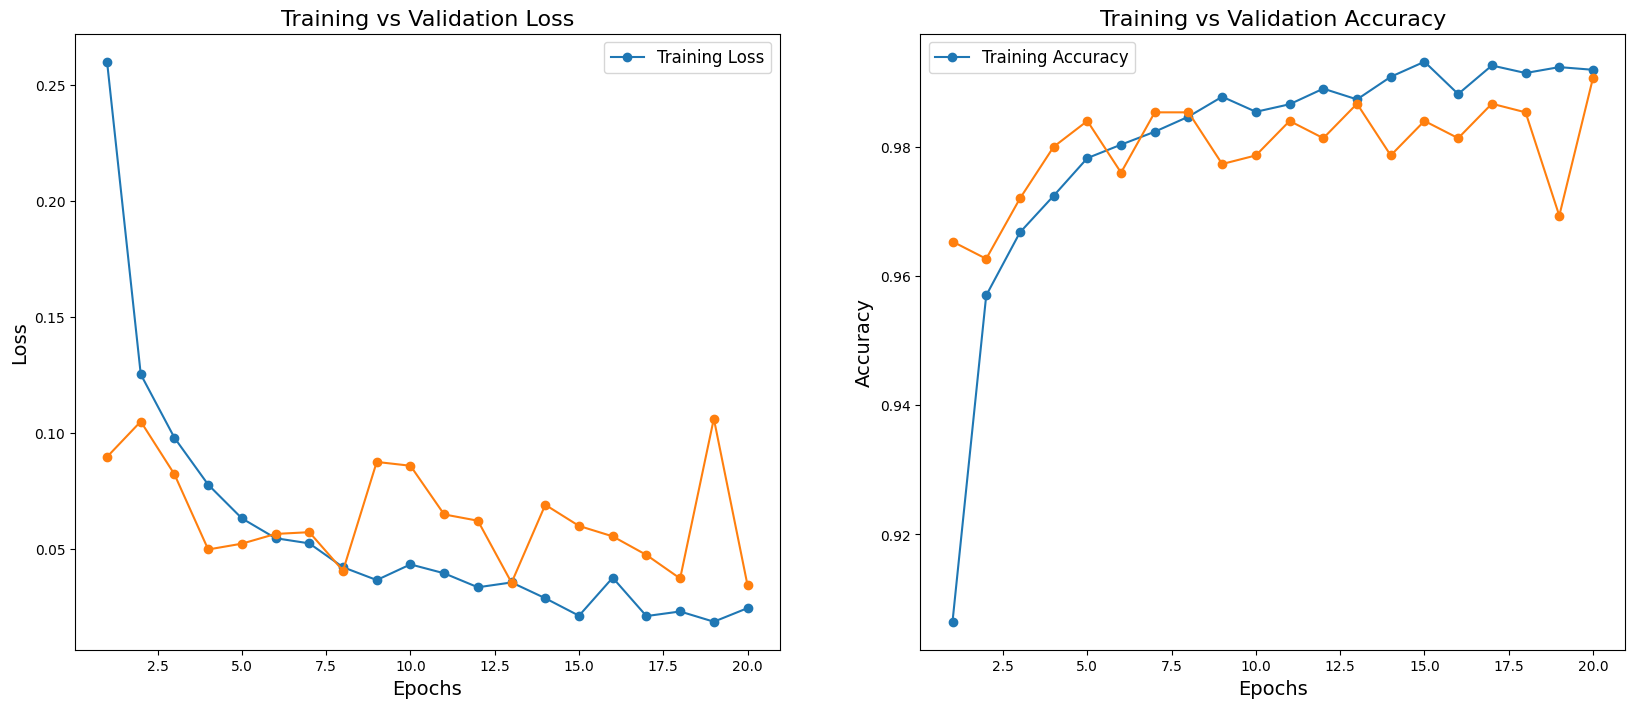

In [32]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[249   0   1]
 [  0 245   5]
 [  1   0 249]]


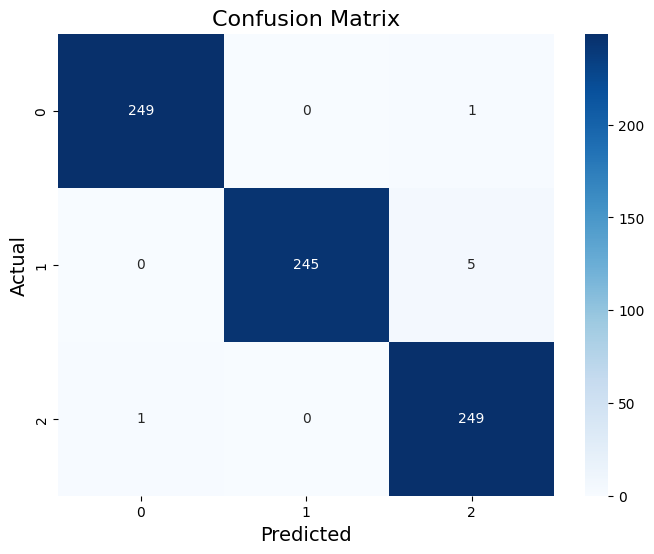

Specificity is only defined for binary classification.
Matthews Correlation Coefficient (MCC): 0.9861
F1 Score: 0.9907
PR AUC is usually computed for binary classification.

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      0.98      0.99       250
           2       0.98      1.00      0.99       250

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



In [33]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [34]:
# Save the model
torch.save(model.state_dict(), "ShuffleNet_v2.pth")

In [35]:
model_ShuffleNet_v2 = model

# NASNet-Mobile

In [36]:
pip install pretrainedmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 962.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.4 MB/s eta 0:00:00
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=4bd35c71cb48ded3cbf105a8fa3495309e2c68e85b753b8870dd00b1f658edbd
  Stored in directory: /root/.cache/pip/wheels/5f/5b/96/fd94bc35962d7c6b699e8814db545155ac91d2b95785e1b035
Successfully built pretrainedmodels
  Att

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from pretrainedmodels import nasnetamobile  # Third-party library

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained NASNet-Mobile
model = nasnetamobile(num_classes=1000, pretrained='imagenet')

# Get number of input features to the final layer
num_ftrs = model.last_linear.in_features

# Replace the final layer
model.last_linear = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

# Move model to device
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("NASNet-Mobile model initialized and ready for training!")

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/nasnetamobile-7e03cead.pth" to /root/.cache/torch/hub/checkpoints/nasnetamobile-7e03cead.pth
100%|██████████| 20.5M/20.5M [00:01<00:00, 17.9MB/s]


NASNet-Mobile model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.0936, Validation Accuracy: 0.9720
Epoch 1/20, Loss: 0.2786, Accuracy: 0.9055
Epoch 2/20
----------


Validation Loss: 0.1180, Validation Accuracy: 0.9707
Epoch 2/20, Loss: 0.1460, Accuracy: 0.9537
Epoch 3/20
----------


Validation Loss: 0.1106, Validation Accuracy: 0.9667
Epoch 3/20, Loss: 0.1359, Accuracy: 0.9547
Epoch 4/20
----------


Validation Loss: 0.0778, Validation Accuracy: 0.9720
Epoch 4/20, Loss: 0.1009, Accuracy: 0.9722
Epoch 5/20
----------


Validation Loss: 0.0689, Validation Accuracy: 0.9760
Epoch 5/20, Loss: 0.0814, Accuracy: 0.9742
Epoch 6/20
----------


Validation Loss: 0.0810, Validation Accuracy: 0.9773
Epoch 6/20, Loss: 0.0858, Accuracy: 0.9722
Epoch 7/20
----------


Validation Loss: 0.0431, Validation Accuracy: 0.9787
Epoch 7/20, Loss: 0.0533, Accuracy: 0.9837
Epoch 8/20
----------


Validation Loss: 0.1037, Validation Accuracy: 0.9827
Epoch 8/20, Loss: 0.0475, Accuracy: 0.9844
Epoch 9/20
----------


Validation Loss: 0.1161, Validation Accuracy: 0.9653
Epoch 9/20, Loss: 0.0690, Accuracy: 0.9785
Epoch 10/20
----------


Validation Loss: 0.0375, Validation Accuracy: 0.9880
Epoch 10/20, Loss: 0.0586, Accuracy: 0.9801
Epoch 11/20
----------


Validation Loss: 0.0536, Validation Accuracy: 0.9813
Epoch 11/20, Loss: 0.0620, Accuracy: 0.9809
Epoch 12/20
----------


Validation Loss: 0.1155, Validation Accuracy: 0.9707
Epoch 12/20, Loss: 0.0395, Accuracy: 0.9885
Epoch 13/20
----------


Validation Loss: 0.0850, Validation Accuracy: 0.9773
Epoch 13/20, Loss: 0.0503, Accuracy: 0.9860
Epoch 14/20
----------


Validation Loss: 0.0422, Validation Accuracy: 0.9840
Epoch 14/20, Loss: 0.0410, Accuracy: 0.9868
Epoch 15/20
----------


Validation Loss: 0.0296, Validation Accuracy: 0.9880
Epoch 15/20, Loss: 0.0258, Accuracy: 0.9924
Epoch 16/20
----------


Validation Loss: 0.0411, Validation Accuracy: 0.9907
Epoch 16/20, Loss: 0.0231, Accuracy: 0.9929
Epoch 17/20
----------


Validation Loss: 0.0963, Validation Accuracy: 0.9653
Epoch 17/20, Loss: 0.0447, Accuracy: 0.9885
Epoch 18/20
----------


Validation Loss: 0.0706, Validation Accuracy: 0.9867
Epoch 18/20, Loss: 0.0344, Accuracy: 0.9882
Epoch 19/20
----------


Validation Loss: 0.0727, Validation Accuracy: 0.9853
Epoch 19/20, Loss: 0.0283, Accuracy: 0.9918
Epoch 20/20
----------


Validation Loss: 0.0674, Validation Accuracy: 0.9840
Epoch 20/20, Loss: 0.0232, Accuracy: 0.9923


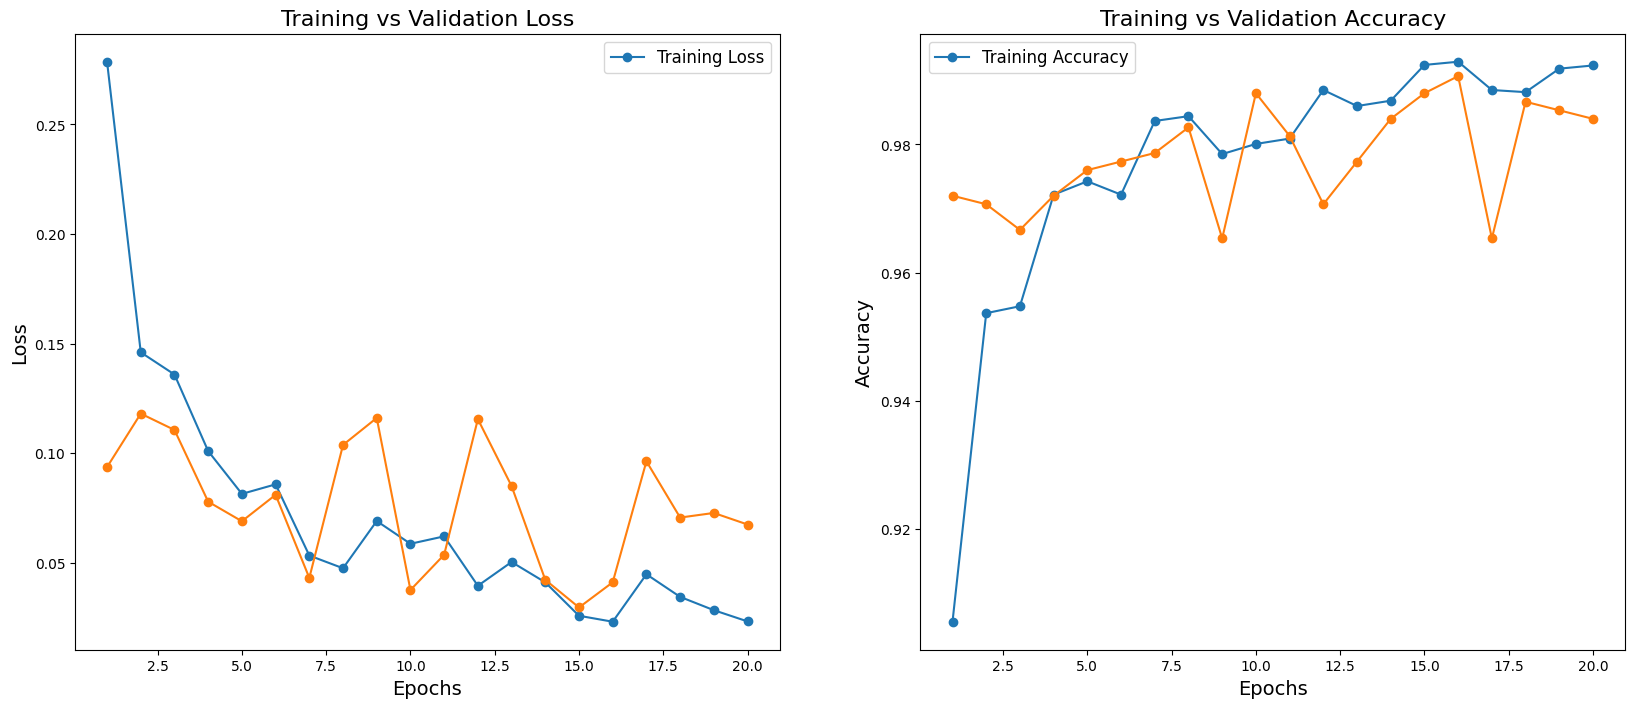

In [38]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[247   0   3]
 [  0 245   5]
 [  0   4 246]]


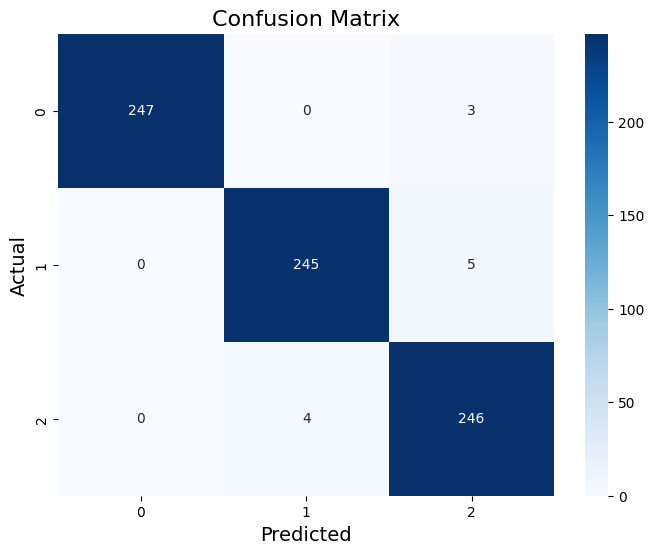

Specificity is only defined for binary classification.
Matthews Correlation Coefficient (MCC): 0.9760
F1 Score: 0.9840
PR AUC is usually computed for binary classification.

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       250
           1       0.98      0.98      0.98       250
           2       0.97      0.98      0.98       250

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750



In [39]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [40]:
# Save the model
torch.save(model.state_dict(), "nasnetmobile.pth")

In [41]:
model_nasnetlarge = model

# Ghost Net

In [42]:
import timm
import torch.nn as nn

# Create model
model = timm.create_model('ghostnet_100', pretrained=True)

# Get the number of features in the final layer
num_ftrs = model.classifier.in_features  # Access the classifier's input features

# Replace the final classification layer
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Ghost Net model initialized and ready for training!")

model.safetensors:   0%|          | 0.00/20.9M [00:00<?, ?B/s]

Ghost Net model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.0499, Validation Accuracy: 0.9840
Epoch 1/20, Loss: 0.1942, Accuracy: 0.9315
Epoch 2/20
----------


Validation Loss: 0.0489, Validation Accuracy: 0.9867
Epoch 2/20, Loss: 0.1055, Accuracy: 0.9677
Epoch 3/20
----------


Validation Loss: 0.0571, Validation Accuracy: 0.9840
Epoch 3/20, Loss: 0.0673, Accuracy: 0.9778
Epoch 4/20
----------


Validation Loss: 0.0474, Validation Accuracy: 0.9800
Epoch 4/20, Loss: 0.0701, Accuracy: 0.9781
Epoch 5/20
----------


Validation Loss: 0.0279, Validation Accuracy: 0.9920
Epoch 5/20, Loss: 0.0385, Accuracy: 0.9863
Epoch 6/20
----------


Validation Loss: 0.1116, Validation Accuracy: 0.9707
Epoch 6/20, Loss: 0.0472, Accuracy: 0.9857
Epoch 7/20
----------


Validation Loss: 0.0354, Validation Accuracy: 0.9853
Epoch 7/20, Loss: 0.0519, Accuracy: 0.9836
Epoch 8/20
----------


Validation Loss: 0.0413, Validation Accuracy: 0.9907
Epoch 8/20, Loss: 0.0412, Accuracy: 0.9878
Epoch 9/20
----------


Validation Loss: 0.0582, Validation Accuracy: 0.9827
Epoch 9/20, Loss: 0.0388, Accuracy: 0.9892
Epoch 10/20
----------


Validation Loss: 0.0815, Validation Accuracy: 0.9747
Epoch 10/20, Loss: 0.0292, Accuracy: 0.9912
Epoch 11/20
----------


Validation Loss: 0.0275, Validation Accuracy: 0.9880
Epoch 11/20, Loss: 0.0220, Accuracy: 0.9928
Epoch 12/20
----------


Validation Loss: 0.0340, Validation Accuracy: 0.9893
Epoch 12/20, Loss: 0.0320, Accuracy: 0.9908
Epoch 13/20
----------


Validation Loss: 0.0336, Validation Accuracy: 0.9867
Epoch 13/20, Loss: 0.0488, Accuracy: 0.9874
Epoch 14/20
----------


Validation Loss: 0.0428, Validation Accuracy: 0.9853
Epoch 14/20, Loss: 0.0229, Accuracy: 0.9938
Epoch 15/20
----------


Validation Loss: 0.0244, Validation Accuracy: 0.9920
Epoch 15/20, Loss: 0.0281, Accuracy: 0.9924
Epoch 16/20
----------


Validation Loss: 0.0360, Validation Accuracy: 0.9907
Epoch 16/20, Loss: 0.0261, Accuracy: 0.9928
Epoch 17/20
----------


Validation Loss: 0.0490, Validation Accuracy: 0.9880
Epoch 17/20, Loss: 0.0310, Accuracy: 0.9922
Epoch 18/20
----------


Validation Loss: 0.0299, Validation Accuracy: 0.9920
Epoch 18/20, Loss: 0.0265, Accuracy: 0.9925
Epoch 19/20
----------


Validation Loss: 0.0698, Validation Accuracy: 0.9813
Epoch 19/20, Loss: 0.0153, Accuracy: 0.9953
Epoch 20/20
----------


Validation Loss: 0.0511, Validation Accuracy: 0.9840
Epoch 20/20, Loss: 0.0194, Accuracy: 0.9951


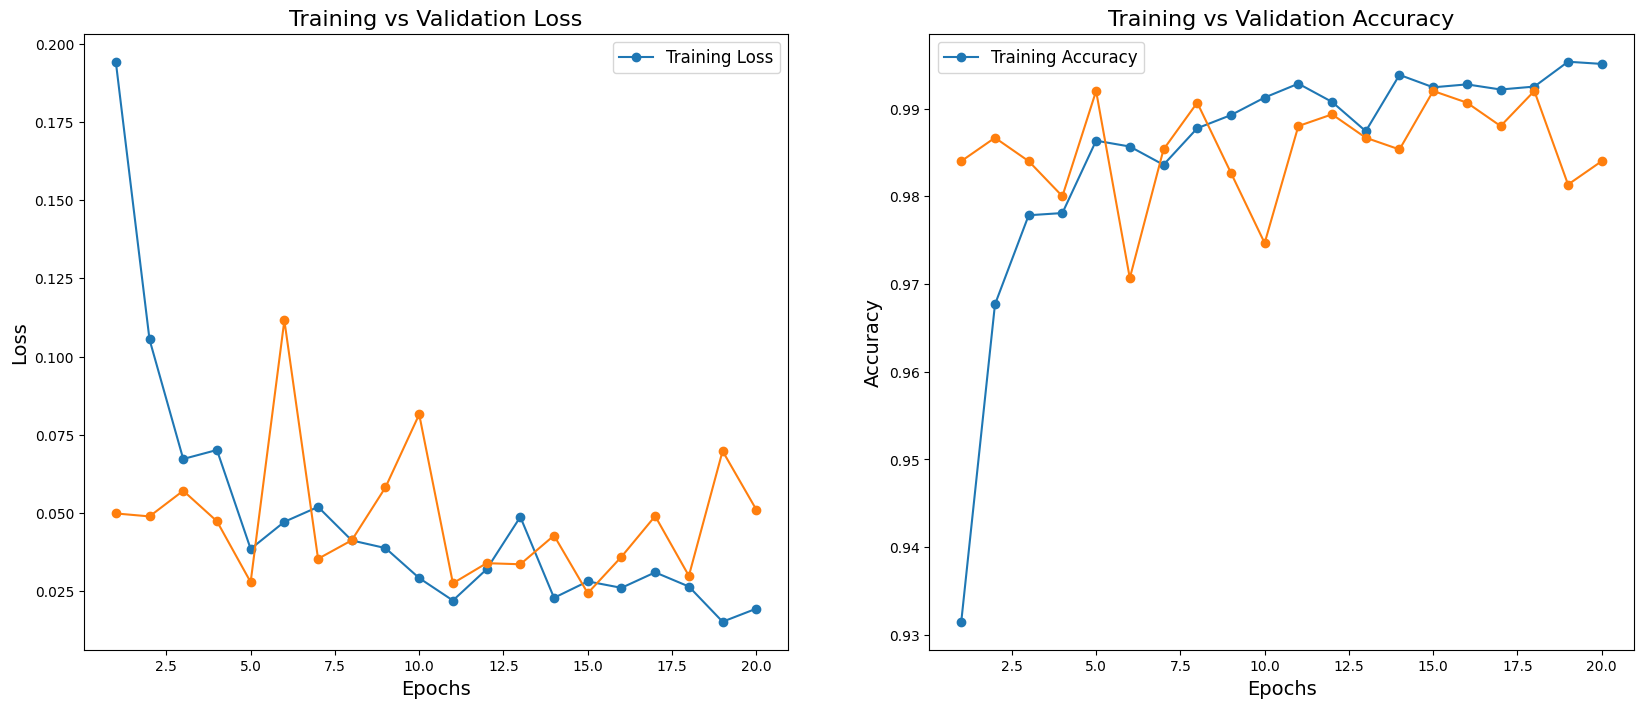

In [43]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[248   1   1]
 [  0 247   3]
 [  1   6 243]]


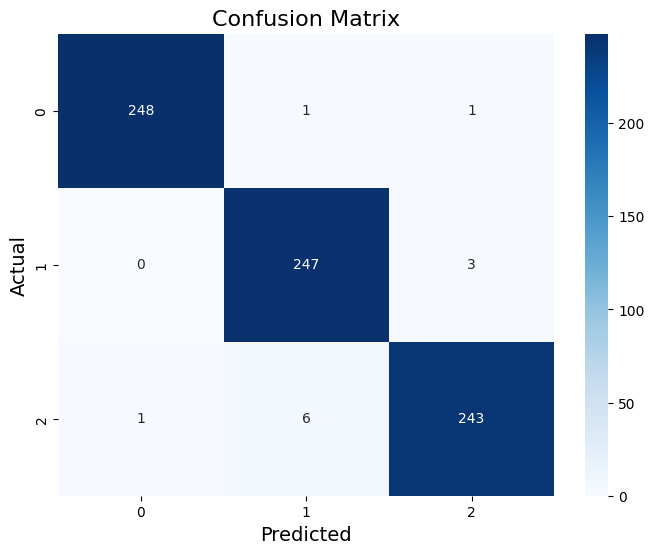

Specificity is only defined for binary classification.
Matthews Correlation Coefficient (MCC): 0.9760
F1 Score: 0.9840
PR AUC is usually computed for binary classification.

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       250
           1       0.97      0.99      0.98       250
           2       0.98      0.97      0.98       250

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750



In [44]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [45]:
# Save the model
torch.save(model.state_dict(), "ghostnet.pth")

In [46]:
model_ghostnet = model

# Dark Net

In [47]:
import timm
import torch.nn as nn

# Install first: pip install timm

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load DarkNet-53
model = timm.create_model('darknet53', pretrained=True)

# Replace head (verify layer name with print(model))
num_ftrs = model.head.fc.in_features
model.head.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Dark Net model initialized and ready for training!")

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Dark Net model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.2126, Validation Accuracy: 0.9267
Epoch 1/20, Loss: 0.3902, Accuracy: 0.8578
Epoch 2/20
----------


Validation Loss: 0.3356, Validation Accuracy: 0.8880
Epoch 2/20, Loss: 0.2019, Accuracy: 0.9321
Epoch 3/20
----------


Validation Loss: 0.2597, Validation Accuracy: 0.8947
Epoch 3/20, Loss: 0.1365, Accuracy: 0.9528
Epoch 4/20
----------


Validation Loss: 0.0853, Validation Accuracy: 0.9760
Epoch 4/20, Loss: 0.1176, Accuracy: 0.9608
Epoch 5/20
----------


Validation Loss: 0.0670, Validation Accuracy: 0.9787
Epoch 5/20, Loss: 0.0801, Accuracy: 0.9730
Epoch 6/20
----------


Validation Loss: 0.0685, Validation Accuracy: 0.9800
Epoch 6/20, Loss: 0.0953, Accuracy: 0.9692
Epoch 7/20
----------


Validation Loss: 0.1812, Validation Accuracy: 0.9480
Epoch 7/20, Loss: 0.0767, Accuracy: 0.9745
Epoch 8/20
----------


Validation Loss: 0.1579, Validation Accuracy: 0.9600
Epoch 8/20, Loss: 0.0621, Accuracy: 0.9782
Epoch 9/20
----------


Validation Loss: 0.0591, Validation Accuracy: 0.9813
Epoch 9/20, Loss: 0.0521, Accuracy: 0.9832
Epoch 10/20
----------


Validation Loss: 0.1019, Validation Accuracy: 0.9640
Epoch 10/20, Loss: 0.0582, Accuracy: 0.9796
Epoch 11/20
----------


Validation Loss: 0.0516, Validation Accuracy: 0.9813
Epoch 11/20, Loss: 0.0502, Accuracy: 0.9842
Epoch 12/20
----------


Validation Loss: 0.0382, Validation Accuracy: 0.9907
Epoch 12/20, Loss: 0.0474, Accuracy: 0.9841
Epoch 13/20
----------


Validation Loss: 0.0811, Validation Accuracy: 0.9720
Epoch 13/20, Loss: 0.0426, Accuracy: 0.9866
Epoch 14/20
----------


Validation Loss: 0.0385, Validation Accuracy: 0.9840
Epoch 14/20, Loss: 0.0444, Accuracy: 0.9865
Epoch 15/20
----------


Validation Loss: 0.0597, Validation Accuracy: 0.9840
Epoch 15/20, Loss: 0.0289, Accuracy: 0.9897
Epoch 16/20
----------


Validation Loss: 0.0537, Validation Accuracy: 0.9827
Epoch 16/20, Loss: 0.0281, Accuracy: 0.9913
Epoch 17/20
----------


Validation Loss: 0.0631, Validation Accuracy: 0.9827
Epoch 17/20, Loss: 0.0344, Accuracy: 0.9894
Epoch 18/20
----------


Validation Loss: 0.0300, Validation Accuracy: 0.9853
Epoch 18/20, Loss: 0.0309, Accuracy: 0.9891
Epoch 19/20
----------


Validation Loss: 0.0641, Validation Accuracy: 0.9880
Epoch 19/20, Loss: 0.0225, Accuracy: 0.9929
Epoch 20/20
----------


Validation Loss: 0.0937, Validation Accuracy: 0.9720
Epoch 20/20, Loss: 0.0243, Accuracy: 0.9929


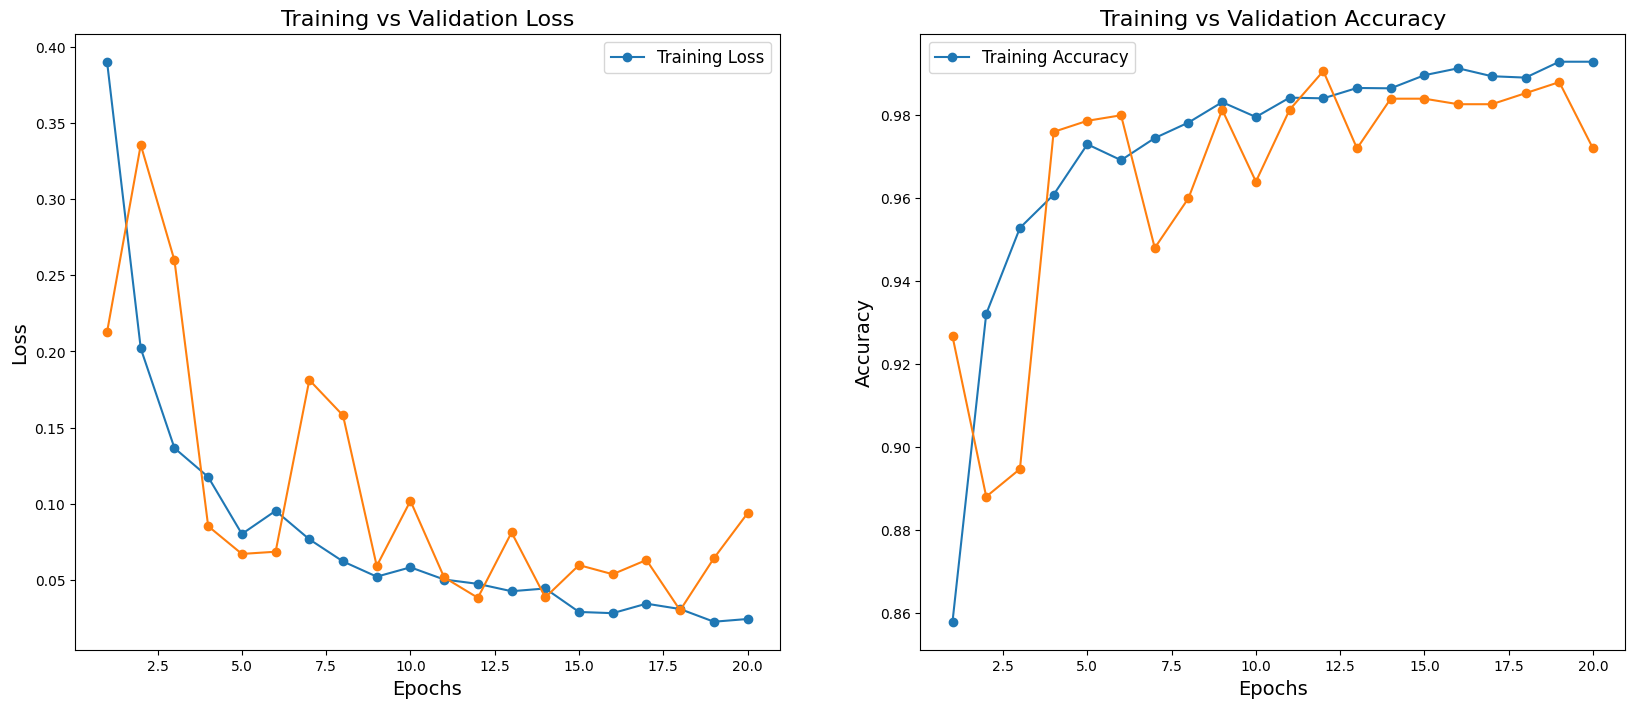

In [48]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[246   3   1]
 [  1 247   2]
 [  3  11 236]]


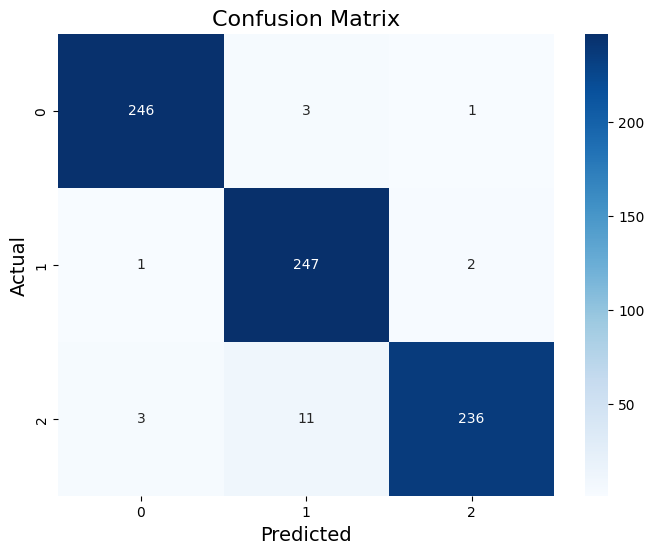

Specificity is only defined for binary classification.
Matthews Correlation Coefficient (MCC): 0.9583
F1 Score: 0.9720
PR AUC is usually computed for binary classification.

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       250
           1       0.95      0.99      0.97       250
           2       0.99      0.94      0.97       250

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750



In [49]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [50]:
# Save the model
torch.save(model.state_dict(), "darknet.pth")

In [51]:
model_darknet = model